# **Hypothesis Test Challenge**
- Test whether the performance metrics and latency times in the data are normally distributed.
Use the Shapiro-Wilk test for normality.
A p-value > 0.05 suggests that the data is normally distributed.
**Don't forget to state your null hypothesis!*

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [5]:
# Load the dataset
data = pd.DataFrame({
    'Group_A_Performance': np.random.normal(loc=50, scale=10, size=300),
    'Group_B_Performance': np.random.normal(loc=55, scale=10, size=300),
    'Group_C_Latency': np.random.exponential(scale=10, size=300)
})

In [6]:
data

,Group_A_Performance,Group_B_Performance,Group_C_Latency
0,40.854008,54.917821,18.586984
1,63.270020,57.954796,5.894822
2,58.776595,39.654631,2.816401
3,48.541256,58.817688,15.326473
4,52.352951,73.673059,3.629523
...,...,...,...
295,58.908083,49.707489,3.341924
296,48.863704,68.084845,8.315321
297,46.276090,47.834625,2.089936
298,50.600755,55.276874,28.761212


# 2. Test for Normality

In [7]:
for column in data.columns:
    # You fill in the rest!
    shapiro_stat, shapiro_p = stats.shapiro(data[column])

    print(column,f"stat: {shapiro_stat}\n",
      f"p: {shapiro_p}\n")


Group_A_Performance stat: 0.9956178945727613
 p: 0.5640640337606857

Group_B_Performance stat: 0.992221319980503
 p: 0.11785878011351153

Group_C_Latency stat: 0.8441907558818956
 p: 1.0063558727137856e-16



# 3. Visualise Distributions

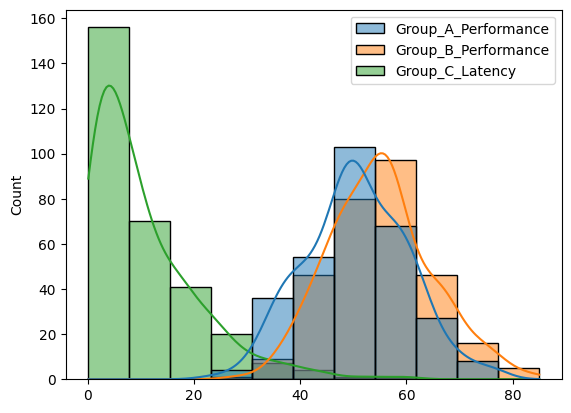

In [8]:
# sns.kdeplot(data)
sns.histplot(data, kde=True)
plt.show()

# 4. Hypothesis Testing

*   Compare the means of Group A and Group B performance metrics using a two-sample
*   Compare Group C latency with Group A performance using a Mann-Whitney U test.

In [9]:
for column in data.columns:
    # You fill in the rest!
    mean = data[column].mean()
    
    print(column,f"mean: {mean}\n")


Group_A_Performance mean: 50.558849954367595

Group_B_Performance mean: 55.0244458165077

Group_C_Latency mean: 10.434748538149192



In [10]:
u_stat, p_value = stats.mannwhitneyu(data["Group_A_Performance"], data["Group_C_Latency"])
print(f"ustat: {u_stat}\n",
      f"p: {p_value}\n")

ustat: 89136.0
 p: 5.516665180814726e-96



In [14]:
if p_value <= 0.05:
    print("Result is statistically significant\nReject the null hypothesis")
else:
    print("Result is not statistically significant\nAccept the null hypothesis")

Result is statistically significant
Reject the null hypothesis


# 5. Visualise Comparisons

- Create boxplots to compare distributions across groups.
- Highlight differences visually to supplement the hypothesis test results.



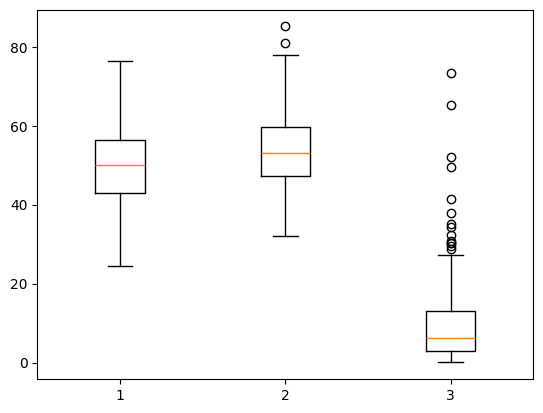

In [51]:
plt.boxplot(data)
plt.show()